## Health Insurance Marketplace ##

### Introduction ###
In the United States, health insurance marketplaces, also called health exchanges, are organizations in each state through which people can purchase health insurance. People can purchase health insurance that complies with the **Patient Protection and Affordable Care Act** (ACA, known colloquially as "Obamacare") at ACA health exchanges, where they can choose from a range of government-regulated and standardized health care plans offered by the insurers participating in the exchange.

ACA health exchanges were fully certified and operational by January 1, 2014, under federal law.


### Dataset ###
**Source:** The dataset is available on the below 2 links. At the kaggle the dataset is consolidated for the year 2014, 2015 and 2016. And at the NBER(the National Bureau of Economic Research) the dataset is available for each year from year 2014 to 2018. I have downloaded only for year 2017 and 2018.
1. https://www.kaggle.com/hhs/health-insurance-marketplace
2. http://www.nber.org/data/cms-marketplace.html<br>

#### Technical terms and definition: ####
> **Benefits**: No one plans to get sick or hurt, but most people need medical care – like a doctor visit, a prescription drug, a lab test, physical therapy, or counseling – at some point. These services can be expensive. And if something happens that requires surgery or emergency medical care, it’s really important to have coverage. Fixing a broken leg can cost up to $7,500, and the average cost of a 3-day hospital stay is around $30,000. The Health Insurance Marketplace offers a variety of high-quality health coverage choices for routine and non-routine medical services that can work for your family and budget.

> **Cost Sharing**: The share of costs covered by your insurance that you pay out of your own pocket. This term generally includes deductibles, coinsurance, and copayments, or similar charges, but it doesn't include premiums, balance billing amounts for non-network providers, or the cost of non-covered services. Cost sharing in Medicaid and CHIP also includes premiums.

> **Rate**: Rate is the monthly premium paid by the insured person. These data either originate from the Rates Table template (i.e., template field), an Excel based form used by issuers to describe their plans in the Qualified Health Plan(QHP)/SADP(Stand Alone Dental Plan) application process, or were generated by CCIIO for use in data processing (i.e., system-generated)

> **Plan**: There are different types of Marketplace health insurance plans designed to meet different needs. Some types of plans restrict your provider choices or encourage you to get care from the plan’s network of doctors, hospitals, pharmacies, and other medical service providers. Others pay a greater share of costs for providers outside the plan’s network.

> **Metal Level**: Levels of plans in the Health Insurance Marketplace: Bronze, Silver, Gold, and Platinum. Categories (sometimes called “metal levels”) are based on how you and your insurance plan split costs. Categories have nothing to do with quality of care. (“Catastrophic” plans are available to some people.) For each plan category, you’ll pay a different percentage of total yearly costs of your care, and your insurance company will pay the rest. Total costs include premiums, deductibles, and out-of-pocket costs like copayments and coinsurance.
Each category may include several types of plans and provider networks, like health maintenance organizations (HMOs) and preferred provider organizations (PPOs).



**Below are the datasets which will be used for my project.**


| File Name |File Description |
| :-------- |:--------------- |
|Benefit cost sharing | Plan-level data on essential health benefits, coverage limits, and cost sharing |
|Rates | Plan-level data on individual rates based on an eligible subscriber's age, tobacco use, and geographic location |
|Plan Attribute|Plan-level data on maximum out of pocket payments, deductibles, cost sharing, HSA eligibility, formulary ID, and other plan attributes |


**1. BenefitCostSharing:** Let's start from first dataset which is Benefit cost sharing dataset.<br>
This is the dataset which will have all the data related to benefits and how the cost is shared for each benefits.<br>
Below are the columns of this dataset which will be used in this project. For more information please refer to the http://www.nber.org/cciio/marketplace-puf/2018/bencs2018.pdf <br>


|Variable Name|Data Type|Varible defination|
|--------------|----------|-------------------|
|BenefitName   |Text      |Name assigned to benefit|
|StateCode |Text|Two-character state abbreviation indicating the state where the plan is offered|
|BusinessYear|Text|Year for which plan provides coverage to enrollees|
        

In [20]:
# This cell will be used for import. All the necessary packages and libraries will be imported.
# As the work on this project moves on, the required packages will be imported.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import Figure
py.sign_in('username', 'password')
from ggplot import *
%matplotlib inline 


In [2]:
##                   Load the data from three csv files. 
#-----------------------------------------------------------------------------------------------

# 1. The csv file which has the 3 years of data i.e. from 2014 to 2016: df_bcs
df_bcs = pd.read_csv('BenefitsCostSharing.csv')

# 2. The csv file which has data from year 2017: bcs_17
bcs_18 = pd.read_csv('Benefits_Cost_Sharing_2018.csv', encoding='cp1252')

# 3. The csv file which has data from year 2018. bcs_18
bcs_17 = pd.read_csv('Benefits_Cost_Sharing_2017.csv', encoding='cp1252')


/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (9,12,19) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
# Check the all dataframes for validation purpose.
df_bcs.head(2)

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6


In [4]:
# Check the all dataframes for validation purpose.
bcs_17.head(2)

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayInnTier2,...,IsEHB,IsCovered,QuantLimitOnSvc,LimitQty,LimitUnit,Exclusions,Explanation,EHBVarReason,IsExclFromInnMOOP,IsExclFromOonMOOP
0,2017,AK,21989,HIOS,2016-08-23 02:28:31,21989AK0030001,21989AK0030001-00,Routine Dental Services (Adult),Not Applicable,NaN,...,NaN,Covered,Yes,1000.0,Dollars per Year,NaN,Combined annual benefit maximum,Not EHB,No,No
1,2017,AK,21989,HIOS,2016-08-23 02:28:31,21989AK0030001,21989AK0030001-00,Dental Check-Up for Children,Not Applicable,NaN,...,Yes,Covered,Yes,1.0,Visit(s) per 6 Months,NaN,NaN,Substantially Equal,No,No


In [5]:
# Check the all dataframes for validation purpose.
bcs_18.head(2)

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayInnTier2,...,IsEHB,IsCovered,QuantLimitOnSvc,LimitQty,LimitUnit,Exclusions,Explanation,EHBVarReason,IsExclFromInnMOOP,IsExclFromOonMOOP
0,2018,AK,21989,HIOS,2017-09-26 02:21:16,21989AK0030001,21989AK0030001-00,Routine Dental Services (Adult),Not Applicable,NaN,...,NaN,Covered,Yes,1000.0,Dollars per Year,NaN,Combined annual benefit maximum,Not EHB,No,No
1,2018,AK,21989,HIOS,2017-09-26 02:21:16,21989AK0030001,21989AK0030001-00,Dental Check-Up for Children,Not Applicable,NaN,...,Yes,Covered,Yes,1.0,Visit(s) per 6 Months,NaN,NaN,Substantially Equal,No,No


It looks like we have 32 columns for the dataset from the first 3 years, i.e. year 2014, 2015, 2016. And we have only 24 columns with the dataset from 2017 and 2018. Data wrangling becomes tricky as the missing columns in the newest dataset could be duplicates or may be not duplicate. Or may be columns we may not need for this analysis.

### Data wrangling for the dataset "BenefitCostSharing"
-----------------------------------------------------------------------------------------------

In [6]:
# setup the pandas to display all the columns of the dataframe.
pd.set_option('display.max_columns', None)

In [7]:
# First merge the two datasets for the year 2017 and 2018: df_bcs17and18
df_bcs17and18 = pd.concat([bcs_17, bcs_18])
df_bcs17and18.head(2)

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayInnTier2,CopayOutofNet,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,IsEHB,IsCovered,QuantLimitOnSvc,LimitQty,LimitUnit,Exclusions,Explanation,EHBVarReason,IsExclFromInnMOOP,IsExclFromOonMOOP
0,2017,AK,21989,HIOS,2016-08-23 02:28:31,21989AK0030001,21989AK0030001-00,Routine Dental Services (Adult),Not Applicable,NaN,Not Applicable,20%,NaN,20%,NaN,Covered,Yes,1000.0,Dollars per Year,NaN,Combined annual benefit maximum,Not EHB,No,No
1,2017,AK,21989,HIOS,2016-08-23 02:28:31,21989AK0030001,21989AK0030001-00,Dental Check-Up for Children,Not Applicable,NaN,Not Applicable,20%,NaN,20%,Yes,Covered,Yes,1.0,Visit(s) per 6 Months,NaN,NaN,Substantially Equal,No,No


In [8]:
# Merge the new dataframe df_2017and2018 with the df_bcs: bcs
bcs = pd.concat([df_bcs, df_bcs17and18])
bcs.head(2)

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,ImportDate,IsCovered,IsEHB,IsExclFromInnMOOP,IsExclFromOonMOOP,IsStateMandate,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,IssuerId2,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,Combined annual benefit maximum of $1000 per y...,2014-03-19 07:06:49,Covered,NaN,No,No,NaN,No,No,21989,21989.0,1000.0,Dollars per Year,NaN,21989AK0010001-00,Yes,68.0,HIOS,21989AK0010001,AK,AK,6.0
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,No,No,21989,21989.0,1.0,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104.0,HIOS,21989AK0010001,AK,AK,6.0


In [9]:
# make sure that number number of recodrs and features are correct.
# Total number of rows and columns: total_rows, total_columns:
total_rows, total_columns = bcs.shape
print("Total number of records:", total_rows)
print("Total number of columns:", total_columns)

Total number of records: 7202371
Total number of columns: 32


In [10]:
# Let's find the columns which are not in the year 2017 and 2018 BenefitCostSharing datasets.
# columns in the datasets for the plan year 2017 and 2018: cols_bcs_17_18
cols_bcs_14_16 = df_bcs.columns

# columns in the datasets for the plan year 2017 and 2018: cols_bcs_17_18
cols_bcs_17_18 = df_bcs17and18.columns

# find missing columns between the two datasets: missing_bcs_cols
missing_bcs_cols = cols_bcs_14_16.difference(cols_bcs_17_18)

# Print the missing columns:
print(missing_bcs_cols)

Index(['IsStateMandate', 'IsSubjToDedTier1', 'IsSubjToDedTier2', 'IssuerId2',
       'MinimumStay', 'RowNumber', 'StateCode2', 'VersionNum'],
      dtype='object')


**Data Cleaning:** The above features/columns are not required for my report hence need to drop these 8 columns.

In [11]:
# drop 8 columns stored in missing_bcs_cols
bcs.drop(missing_bcs_cols, axis=1, inplace=True)
bcs.shape  # make sure the number of rows above are same but columns have reduced.

(7202371, 24)

#### Let's analyse how the plans are spread across the states since the the launch of the Exchange.

In [12]:
# check columns with number of null or empty values.
bcs.isnull().sum()

BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1592440
CoinsInnTier2          6305825
CoinsOutofNet          1592440
CopayInnTier1          1592440
CopayInnTier2          6305825
CopayOutofNet          1592442
EHBVarReason           4545720
Exclusions             6575080
Explanation            5572236
ImportDate                   0
IsCovered               293737
IsEHB                  2367810
IsExclFromInnMOOP      1329924
IsExclFromOonMOOP      1328436
IssuerId                     0
LimitQty               6213783
LimitUnit              6213609
PlanId                       0
QuantLimitOnSvc        4794911
SourceName                   0
StandardComponentId          0
StateCode                    0
dtype: int64

In [13]:
# fill all empty and null values with nan
bcs= bcs.fillna(np.nan)

In [17]:
# Unique plan sold in the united states since the inception of Exchange: unique_plan
unique_plan = bcs.BenefitName.nunique()
print("Unique plan offered to Americans:",unique_plan)
print("Number of states participated in the Exchange program:",bcs.StateCode.nunique())

Unique plan offered to Americans: 964
Number of states participated in the Exchange program: 40


Over the period of 5 years, American were offered 964 unique benefits. Interestingly not all the 50 states have participated in the marketplace or Exchange. For example California, New york.<br>
States who are not participating in the federal run marketplace they have their own state run exchange. There are actually only 39 states who are using federal run health insurance marketplace. Idaho moved to state run marketplace after the first year of enrollment. And state run marketplace of Kentucky was dismentalled in year 2016 and joined federal run exchange. The above number 40 is the number of states who were/are associated with federal run exchange since its inception.

In [15]:
# List of benefit type topping the chart in a given business year
bcs[['BusinessYear','BenefitName']].groupby('BusinessYear').describe()

BenefitName                                         
                   count unique                        top   freq
BusinessYear                                                     
2014             1164869    496  Basic Dental Care - Child  18719
2015             2079286    517        Orthodontia - Adult  31269
2016             1804253    429        Orthodontia - Adult  27389
2017             1324275    281  Basic Dental Care - Adult  21371
2018              829688    259        Orthodontia - Adult  13861

In [16]:
# Lets see how many benefits are available statewise.
bcs[['StateCode','BenefitName']].groupby('StateCode').count().sort_values('BenefitName')
uniq_state = bcs.StateCode.unique()
benefits = []

for state in uniq_state:
    state_benefit = len(bcs[bcs['StateCode'] == state])
    benefits.append(state_benefit)

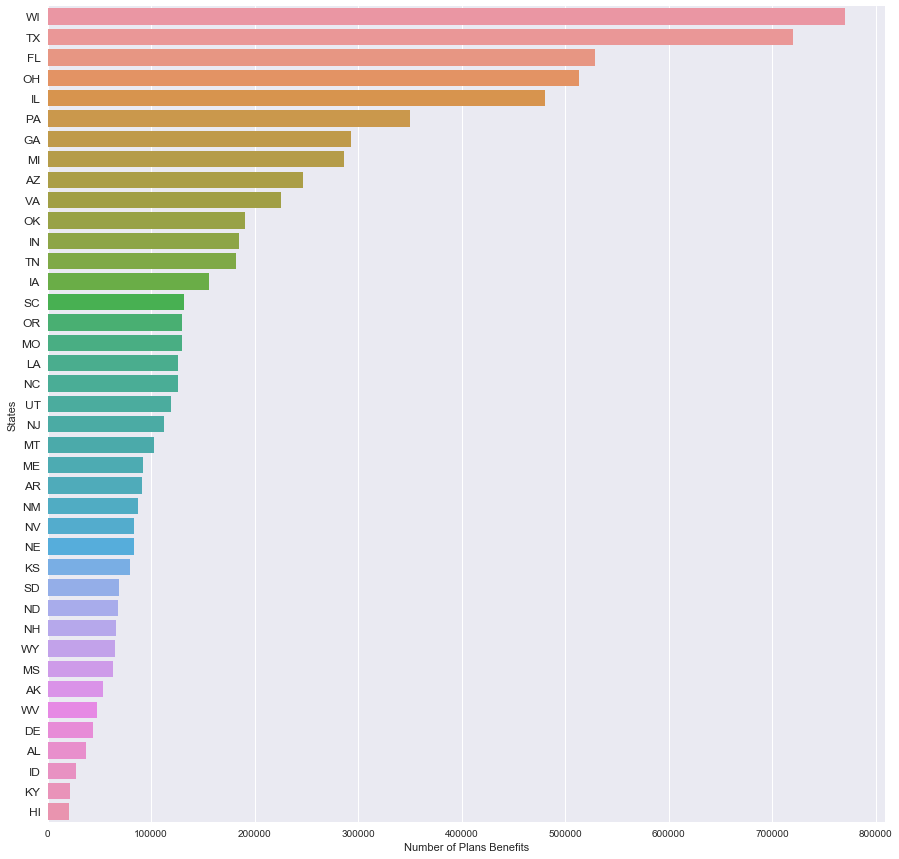

In [18]:
df = pd.DataFrame(
    {'state': uniq_state,
     'Count' : benefits
     })

df = df.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(df.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = df.state, x= df.Count)
plt.ylabel('States')
plt.xlabel('Number of Plans Benefits')
plt.show()

Lets see how the benefits are spread statewise on the USA map using **Choropleth.**

In [21]:
data = Data([
    Choropleth(z = df['Count'],
               autocolorscale=False,
               colorbar=ColorBar(title='No of Benefit plans'),
               colorscale=[[0.0, 'rgb(242,240,247)'], [0.2, 'rgb(218,218,235)'], [0.4, 'rgb(188,189,220)'], [0.6, 'rgb(158,154,200)'], [0.8, 'rgb(117,107,177)'], [1.0, 'rgb(84,39,143)']],
               hoverinfo='location+z',
               locations = df['state'],
               locationmode = 'USA-states',
               text = df['state'],
               marker = Marker(line=Line(color='rgb(255,255,255)', width=2))
              )])

layout = Layout(title = 'Benefit plan spread across state',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

fig = Figure(data=data, layout=layout)

py.iplot(fig)


So we can say that Wisconsin(WI) offers most number of benefit plans to the population and Texas is second. In the above map the darker the color the more number of benefits offered. Hover the mouse on the state to find out the number of benefits offered in that particular state. <br>
Also notice that not all the states are using the Exchange run by Federal Government. The complete white states are representing those states. There are only 39 states who are offering benefits using exchange.

#### Let's see how the Rates for the plans are distributed across all the participating states ####
------------------------------------------------------------------------------------------

#### Data Wrangling on rates dataset ####

**2.Rates**: For this analysis I would use Rates dataset. This Dataset has plan-level data on individual rates based on an eligible subscriber's age, tobacco use, and geographic location.<br>
Below columns are going to be used for analysis of how the plan are distributed across all states based on the average individual premium. Like on average which state pays more for individual premiums. For further information please refer to link http://www.nber.org/cciio/marketplace-puf/2018/rate2018.pdf<br>

|Variable Name|Data Type|Varible defination|
|--------------|----------|-------------------|
|IndividualRate|Float64|Dollar value for the insurance premium cost applicable to a non-tobacco user for the insurance plan in a rating area, or to a general subscriber if there is no tobacco preference|
|StateCode|Text|Two-character state abbreviation indicating the state where the plan is offered|
|MeanRate|Float64|Derived from IndividualRate, average for each state|

In [23]:
# Load the data into pandas dataframes from three csv files.

# First load the rates csv file from the year 2014, 2015 and 2016: df_rates
df_rates = pd.read_csv('Rate.csv')

# Second load the rates scv files from the year 2017: df_rates_17
df_rates_17 = pd.read_csv('Rate_2017.csv')

# Third load the rates csv files from the year 2018: df_rates_18
df_rates_18 = pd.read_csv('Rate_2018.csv')

In [24]:
df_rates.head(2)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14


In [25]:
df_rates.shape

(12694445, 24)

There are more than 12.5 million records in this dataset which includes data from year 2014 to 2016. Data from year 2017 to 2018 are below.

In [26]:
df_rates_17.head(2)

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,2017,AK,21989,HIOS,2016-08-23 02:28:31,93-0438772,2017-01-01,2017-12-31,21989AK0030001,Rating Area 1,No Preference,0-20,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,AK,21989,HIOS,2016-08-23 02:28:31,93-0438772,2017-01-01,2017-03-31,21989AK0090001,Rating Area 1,No Preference,0-20,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_rates_17.shape

(3098756, 21)

In [28]:
df_rates_18.head(2)

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,2018,AK,21989,HIOS,2017-09-26 02:21:16,93-0438772,2018-01-01,2018-12-31,21989AK0030001,Rating Area 1,No Preference,0-14,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,AK,21989,HIOS,2017-09-26 02:21:16,93-0438772,2018-01-01,2018-03-31,21989AK0090001,Rating Area 1,No Preference,0-14,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_rates_18.shape

(2287807, 21)

Since df_rates_17 and df_rates_18 have same number of columns, lets merge these two dataset first.

In [30]:
# Merge dataset df_rates_17 and df_rates_18: df_rates_17and18
df_rates_17and18 = pd.concat([df_rates_17, df_rates_18])

In [31]:
df_rates_17and18.shape

(5386563, 21)

In [32]:
# Merge the rates dataset (year 2014, 2015 and 2016) with dataset year 2017 and 2018: rates
rates = pd.concat([df_rates, df_rates_17and18])

In [33]:
rates.head(2)

,Age,BusinessYear,Couple,CoupleAndOneDependent,CoupleAndThreeOrMoreDependents,CoupleAndTwoDependents,FederalTIN,ImportDate,IndividualRate,IndividualTobaccoRate,IssuerId,IssuerId2,PlanId,PrimarySubscriberAndOneDependent,PrimarySubscriberAndThreeOrMoreDependents,PrimarySubscriberAndTwoDependents,RateEffectiveDate,RateExpirationDate,RatingAreaId,RowNumber,SourceName,StateCode,Tobacco,VersionNum
0,0-20,2014,NaN,NaN,NaN,NaN,93-0438772,2014-03-19 07:06:49,29.00,NaN,21989,21989.0,21989AK0010001,NaN,NaN,NaN,2014-01-01,2014-12-31,Rating Area 1,14.0,HIOS,AK,No Preference,6.0
1,Family Option,2014,73.9,144.56,144.56,144.56,93-0438772,2014-03-19 07:06:49,36.95,NaN,21989,21989.0,21989AK0020001,107.61,107.61,107.61,2014-01-01,2014-12-31,Rating Area 1,14.0,HIOS,AK,No Preference,6.0


In [34]:
# check number of columns: should be 24
rates.shape

(18081008, 24)

In [35]:
rates_17and18_cols = df_rates_17and18.columns

In [36]:
rates_14to16_cols = df_rates.columns

In [37]:
missing_rates_cols = rates_14to16_cols.difference(rates_17and18_cols)
print(missing_rates_cols)

Index(['IssuerId2', 'RowNumber', 'VersionNum'], dtype='object')


There are 3 fewer columns in the dataset for the year 2017 and 2018, these three columns which are not available in the year 2017 and 2018 will be dropped as we do not need these system generated data for this project. 

In [38]:
# drop 3 columns from rates dataset
rates.drop(missing_rates_cols, axis = 1, inplace=True)
rates.shape # make sure we have 21 columns in our dataset.

(18081008, 21)

In [39]:
# There are seudo 9999 numbers for the ones that didn't have the individual rate, hence we are 
# filtering the records out whose indivisual rate is more than 9000.
# Lets get the individual plan rates for all the states: df_IndRate
df_IndRate = rates[['IndividualRate','StateCode']][
    rates.IndividualRate < 9000.0].groupby('StateCode')

In [40]:
# Calculating mean for each individual state: state_mean
state_mean = df_IndRate.mean()

# reset index so that we have two columns StateCode and IndividualRate
state_mean = state_mean.reset_index()


In [41]:
# change column name from IndividualRate to MeanRate
state_mean = state_mean.rename(columns={'IndividualRate':'MeanRate'})
state_mean.head()

,StateCode,MeanRate
0,AK,684.639431
1,AL,260.181607
2,AR,230.654717
3,AZ,336.203584
4,DE,370.032750


In [42]:
# sorting the table to make it more readable.
state_mean = state_mean.sort_values('MeanRate')

Lets plot a bar plot for this Mean Rate for all the participating states.

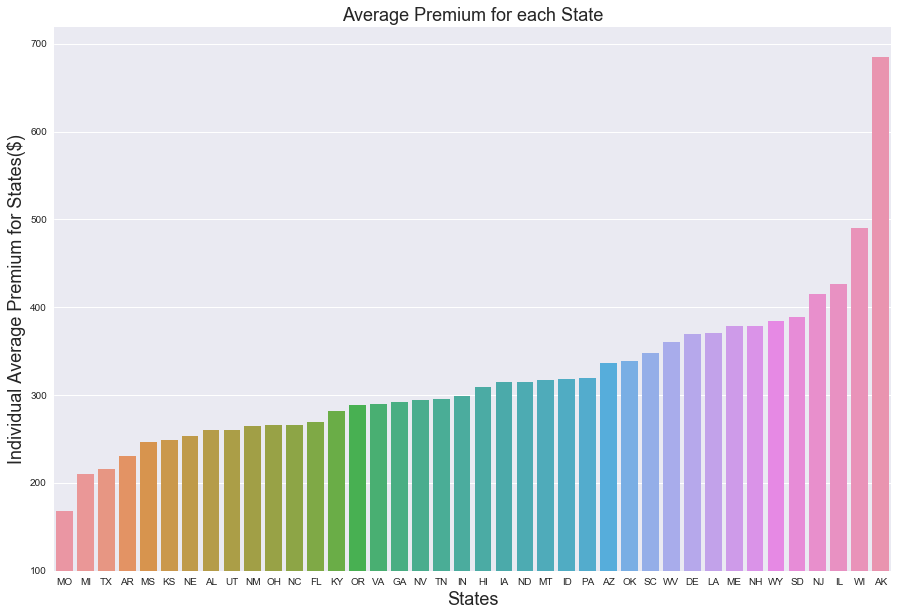

In [46]:
f, ax = plt.subplots(figsize=(15, 10)) 
ax.set_xticklabels(state_mean.MeanRate)
g = sns.barplot(x = state_mean.StateCode, y= state_mean.MeanRate)
plt.ylim(100)
plt.xlabel('States', fontsize = 18)
plt.ylabel('Individual Average Premium for States($)', fontsize=18)
plt.title('Average Premium for each State', fontsize= 18)
plt.show()

Lets try to put this on USA map using Chorolpeth plot.

In [48]:
data = Data([
    Choropleth(z = state_mean['MeanRate'],
               autocolorscale=True,
               colorbar=ColorBar(title='Average Premium'),
               #colorscale=[[0.0, 'rgb(252,250,256)'], [0.2, 'rgb(228,228,245)'], [0.4, 'rgb(198,199,230)'], [0.6, 'rgb(168,164,210)'], [0.8, 'rgb(127,117,187)'], [1.0, 'rgb(94,103,153)']],
               colorscale='YIOrRed',
               hoverinfo='location+z',
               locations = state_mean['StateCode'],
               locationmode = 'USA-states',
               text = state_mean['StateCode'],
               marker = Marker(line=Line(color='rgb(255,255,255)', width=2))
              )])

layout = Layout(title = 'Individual Average Premium($/month) for each state',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

fig = Figure(data=data, layout=layout)

py.iplot(fig)

We can see people in Alaska pay more monthly perium on average for any medical service.

### Now lets analyze how do plan benefits relate to plan rates ###

**3.PlanAttributes:** Plan-level data on maximum out of pocket payments, deductibles, cost sharing, HSA eligibility, formulary ID, and other plan attributes.<br>
I would be using the below columns of the plan attribute, there would be some derived columns also for which explation is given at the time of derivation of the column.We would need Plan Attribute, and Rates dataset for this analysis. For further information on Plan attribute dataset columns refer to the link http://www.nber.org/cciio/marketplace-puf/2018/plan2018.pdf <br>

|Variable Name|Data Type|Varible defination|
|--------------|----------|-------------------|
|PlanId|Text|Seventeen-character alpha-numeric code that identifies an insurance plan’s cost sharing reduction (CSR) variant within HIOS|
|MetalLevel|Text|Metal level, or coverage category, of insurance plan based on its actuarial value|
|TEHBInnTier1IndividualMOOP|Text|The dollar amount of the tier 1 in network, individual out-of-pocket cost limit for medical and drug EHB benefits|
|TEHBInnTier2IndividualMOOP|Text|The dollar amount of the tier 2 in network, individual out-of-pocket cost limit for medical and drug EHB benefits|
|TEHBOutOfNetIndividualMOOP|Text|The dollar amount of the out of network, individual out-of-pocket cost limit for medical and drug EHB benefits|
|Age|Text|Age of the insured at the time of purchase of insurance|
|IssuerID|Text|Five-digit numeric code that identifies the issuer organization in the Health Insurance Oversight System (HIOS)|

#### Data Wrangling on plan attribute dataset. ####

In [52]:
# we already have the dataset for the rates in rates dataframe.
rates.head(2)

,Age,BusinessYear,Couple,CoupleAndOneDependent,CoupleAndThreeOrMoreDependents,CoupleAndTwoDependents,FederalTIN,ImportDate,IndividualRate,IndividualTobaccoRate,IssuerId,PlanId,PrimarySubscriberAndOneDependent,PrimarySubscriberAndThreeOrMoreDependents,PrimarySubscriberAndTwoDependents,RateEffectiveDate,RateExpirationDate,RatingAreaId,SourceName,StateCode,Tobacco
0,0-20,2014,NaN,NaN,NaN,NaN,93-0438772,2014-03-19 07:06:49,29.00,NaN,21989,21989AK0010001,NaN,NaN,NaN,2014-01-01,2014-12-31,Rating Area 1,HIOS,AK,No Preference
1,Family Option,2014,73.9,144.56,144.56,144.56,93-0438772,2014-03-19 07:06:49,36.95,NaN,21989,21989AK0020001,107.61,107.61,107.61,2014-01-01,2014-12-31,Rating Area 1,HIOS,AK,No Preference


In [82]:
# select or create new dataframe to inlcude only required columns and having only data where
# rates are < 9999: indiv_rate
indiv_rate = rates[(rates['Age'] != 'Family Option') & (rates['IndividualRate'] < 9000)]
indiv_rate.head(2)

,Age,BusinessYear,Couple,CoupleAndOneDependent,CoupleAndThreeOrMoreDependents,CoupleAndTwoDependents,FederalTIN,ImportDate,IndividualRate,IndividualTobaccoRate,IssuerId,PlanId,PrimarySubscriberAndOneDependent,PrimarySubscriberAndThreeOrMoreDependents,PrimarySubscriberAndTwoDependents,RateEffectiveDate,RateExpirationDate,RatingAreaId,SourceName,StateCode,Tobacco
0,0-20,2014,NaN,NaN,NaN,NaN,93-0438772,2014-03-19 07:06:49,29.0,NaN,21989,21989AK0010001,NaN,NaN,NaN,2014-01-01,2014-12-31,Rating Area 1,HIOS,AK,No Preference
3,21,2014,NaN,NaN,NaN,NaN,93-0438772,2014-03-19 07:06:49,32.0,NaN,21989,21989AK0010001,NaN,NaN,NaN,2014-01-01,2014-12-31,Rating Area 1,HIOS,AK,No Preference


In [83]:
# drop columns which are not required.
dropped_cols_rate = ['Couple', 'PrimarySubscriberAndOneDependent',
       'PrimarySubscriberAndTwoDependents',
       'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent',
       'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents']
indiv_rate = indiv_rate.drop(dropped_cols_rate, axis=1)

In [54]:
# Load plan attribute dataset into datafram: pa_df
pa_df = pd.read_csv('PlanAttributes.csv')
pa_df.head(2)
# this dataset has the data from the year 2014 to 2016, so we would merge this with the year 
# 2017 and 2018 datasets.

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.



,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BenefitPackageId,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyMOOP,DEHBCombInnOonFamilyPerGroupMOOP,DEHBCombInnOonFamilyPerPersonMOOP,DEHBCombInnOonIndividualMOOP,DEHBDedCombInnOonFamily,DEHBDedCombInnOonFamilyPerGroup,DEHBDedCombInnOonFamilyPerPerson,DEHBDedCombInnOonIndividual,DEHBDedInnTier1Coinsurance,DEHBDedInnTier1Family,DEHBDedInnTier1FamilyPerGroup,DEHBDedInnTier1FamilyPerPerson,DEHBDedInnTier1Individual,DEHBDedInnTier2Coinsurance,DEHBDedInnTier2Family,DEHBDedInnTier2FamilyPerGroup,DEHBDedInnTier2FamilyPerPerson,DEHBDedInnTier2Individual,DEHBDedOutOfNetFamily,DEHBDedOutOfNetFamilyPerGroup,DEHBDedOutOfNetFamilyPerPerson,DEHBDedOutOfNetIndividual,DEHBInnTier1FamilyMOOP,DEHBInnTier1FamilyPerGroupMOOP,DEHBInnTier1FamilyPerPersonMOOP,DEHBInnTier1IndividualMOOP,DEHBInnTier2FamilyMOOP,DEHBInnTier2FamilyPerGroupMOOP,DEHBInnTier2FamilyPerPersonMOOP,DEHBInnTier2IndividualMOOP,DEHBOutOfNetFamilyMOOP,DEHBOutOfNetFamilyPerGroupMOOP,DEHBOutOfNetFamilyPerPersonMOOP,DEHBOutOfNetIndividualMOOP,DentalOnlyPlan,DiseaseManagementProgramsOffered,EHBPediatricDentalApportionmentQuantity,EHBPercentPremiumS4,EHBPercentTotalPremium,FirstTierUtilization,FormularyId,FormularyURL,HIOSProductId,HPID,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,ImportDate,IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee,InpatientCopaymentMaximumDays,IsGuaranteedRate,IsHSAEligible,IsNewPlan,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,IssuerActuarialValue,IssuerId,IssuerId2,MEHBCombInnOonFamilyMOOP,MEHBCombInnOonFamilyPerGroupMOOP,MEHBCombInnOonFamilyPerPersonMOOP,MEHBCombInnOonIndividualMOOP,MEHBDedCombInnOonFamily,MEHBDedCombInnOonFamilyPerGroup,MEHBDedCombInnOonFamilyPerPerson,MEHBDedCombInnOonIndividual,MEHBDedInnTier1Coinsurance,MEHBDedInnTier1Family,MEHBDedInnTier1FamilyPerGroup,MEHBDedInnTier1FamilyPerPerson,MEHBDedInnTier1Individual,MEHBDedInnTier2Coinsurance,MEHBDedInnTier2Family,MEHBDedInnTier2FamilyPerGroup,MEHBDedInnTier2FamilyPerPerson,MEHBDedInnTier2Individual,MEHBDedOutOfNetFamily,MEHBDedOutOfNetFamilyPerGroup,MEHBDedOutOfNetFamilyPerPerson,MEHBDedOutOfNetIndividual,MEHBInnTier1FamilyMOOP,MEHBInnTier1FamilyPerGroupMOOP,MEHBInnTier1FamilyPerPersonMOOP,MEHBInnTier1IndividualMOOP,MEHBInnTier2FamilyMOOP,MEHBInnTier2FamilyPerGroupMOOP,MEHBInnTier2FamilyPerPersonMOOP,MEHBInnTier2IndividualMOOP,MEHBOutOfNetFamilyMOOP,MEHBOutOfNetFamilyPerGroupMOOP,MEHBOutOfNetFamilyPerPersonMOOP,MEHBOutOfNetIndividualMOOP,MarketCoverage,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MetalLevel,MultipleInNetworkTiers,NationalNetwork,NetworkId,OutOfCountryCoverage,OutOfCountryCoverageDescription,OutOfServiceAreaCoverage,OutOfServiceAreaCoverageDescription,PlanBrochure,PlanEffictiveDate,PlanExpirationDate,PlanId,PlanLevelExclusions,PlanMarketingName,PlanType,QHPNonQHPTypeId,RowNumber,SBCHavingDiabetesCoinsurance,SBCHavingDiabetesCopayment,SBCHavingDiabetesDeductible,SBCHavingDiabetesLimit,SBCHavingaBabyCoinsurance,SBCHavingaBabyCopayment,SBCHavingaBabyDeductible,SBCHavingaBabyLimit,SecondTierUtilization,ServiceAreaId,SourceName,SpecialistRequiringReferral,SpecialtyDrugMaximumCoinsurance,StandardComponentId,StateCode,StateCode2,TEHBCombInnOonFamilyMOOP,TEHBCombInnOonFamilyPerGroupMOOP,TEHBCombInnOonFamilyPerPersonMOOP,TEHBCombInnOonIndividualMOOP,TEHBDedCombInnOonFamily,TEHBDedCombInnOonFamilyPerGroup,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonIndividual,TEHBDedInnTier1Coinsurance,TEHBDedInnTier1Family,TEHBDedInnTier1FamilyPerGroup,TEHBDedInnTier1FamilyPerPerson,TEHBDedInnTier1Individual,TEHBDedInnTier2Coinsurance,TEHBDedInnTier2Family,TEHBDedInnTier2FamilyPerGroup,TEHBDedInnTier2FamilyPerPerson,TEHBDedInnTier2Individual,TEHBDedOutOfNetFamily,TEHBDedOutOfNetFamilyPerGroup,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutO

In [56]:
# load plan attribute dataset for the year 2017
pa_17_df = pd.read_csv('Plan_Attributes_2017.csv', encoding='cp1252')
pa_17_df.head(2)

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (72,73,74,81,82,83,87,88,89,90,91,92,149) have mixed types. Specify dtype option on import or set low_memory=False.



,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,MarketCoverage,DentalOnlyPlan,TIN,StandardComponentId,PlanMarketingName,HIOSProductId,HPID,NetworkId,ServiceAreaId,FormularyId,IsNewPlan,PlanType,MetalLevel,DesignType,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,SpecialistRequiringReferral,PlanLevelExclusions,IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee,CompositeRatingOffered,ChildOnlyOffering,ChildOnlyPlanId,WellnessProgramOffered,DiseaseManagementProgramsOffered,EHBPercentTotalPremium,EHBPediatricDentalApportionmentQuantity,IsGuaranteedRate,PlanEffictiveDate,PlanExpirationDate,OutOfCountryCoverage,OutOfCountryCoverageDescription,OutOfServiceAreaCoverage,OutOfServiceAreaCoverageDescription,NationalNetwork,URLForEnrollmentPayment,FormularyURL,PlanId,PlanVariantMarketingName,CSRVariationType,IssuerActuarialValue,AVCalculatorOutputNumber,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,FirstTierUtilization,SecondTierUtilization,SBCHavingaBabyDeductible,SBCHavingaBabyCopayment,SBCHavingaBabyCoinsurance,SBCHavingaBabyLimit,SBCHavingDiabetesDeductible,SBCHavingDiabetesCopayment,SBCHavingDiabetesCoinsurance,SBCHavingDiabetesLimit,SBCHavingSimplefractureDeductible,SBCHavingSimplefractureCopayment,SBCHavingSimplefractureCoinsurance,SBCHavingSimplefractureLimit,SpecialtyDrugMaximumCoinsurance,InpatientCopaymentMaximumDays,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,MEHBInnTier1IndividualMOOP,MEHBInnTier1FamilyPerPersonMOOP,MEHBInnTier1FamilyPerGroupMOOP,MEHBInnTier2IndividualMOOP,MEHBInnTier2FamilyPerPersonMOOP,MEHBInnTier2FamilyPerGroupMOOP,MEHBOutOfNetIndividualMOOP,MEHBOutOfNetFamilyPerPersonMOOP,MEHBOutOfNetFamilyPerGroupMOOP,MEHBCombInnOonIndividualMOOP,MEHBCombInnOonFamilyPerPersonMOOP,MEHBCombInnOonFamilyPerGroupMOOP,DEHBInnTier1IndividualMOOP,DEHBInnTier1FamilyPerPersonMOOP,DEHBInnTier1FamilyPerGroupMOOP,DEHBInnTier2IndividualMOOP,DEHBInnTier2FamilyPerPersonMOOP,DEHBInnTier2FamilyPerGroupMOOP,DEHBOutOfNetIndividualMOOP,DEHBOutOfNetFamilyPerPersonMOOP,DEHBOutOfNetFamilyPerGroupMOOP,DEHBCombInnOonIndividualMOOP,DEHBCombInnOonFamilyPerPersonMOOP,DEHBCombInnOonFamilyPerGroupMOOP,TEHBInnTier1IndividualMOOP,TEHBInnTier1FamilyPerPersonMOOP,TEHBInnTier1FamilyPerGroupMOOP,TEHBInnTier2IndividualMOOP,TEHBInnTier2FamilyPerPersonMOOP,TEHBInnTier2FamilyPerGroupMOOP,TEHBOutOfNetIndividualMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBCombInnOonIndividualMOOP,TEHBCombInnOonFamilyPerPersonMOOP,TEHBCombInnOonFamilyPerGroupMOOP,MEHBDedInnTier1Individual,MEHBDedInnTier1FamilyPerPerson,MEHBDedInnTier1FamilyPerGroup,MEHBDedInnTier1Coinsurance,MEHBDedInnTier2Individual,MEHBDedInnTier2FamilyPerPerson,MEHBDedInnTier2FamilyPerGroup,MEHBDedInnTier2Coinsurance,MEHBDedOutOfNetIndividual,MEHBDedOutOfNetFamilyPerPerson,MEHBDedOutOfNetFamilyPerGroup,MEHBDedCombInnOonIndividual,MEHBDedCombInnOonFamilyPerPerson,MEHBDedCombInnOonFamilyPerGroup,DEHBDedInnTier1Individual,DEHBDedInnTier1FamilyPerPerson,DEHBDedInnTier1FamilyPerGroup,DEHBDedInnTier1Coinsurance,DEHBDedInnTier2Individual,DEHBDedInnTier2FamilyPerPerson,DEHBDedInnTier2FamilyPerGroup,DEHBDedInnTier2Coinsurance,DEHBDedOutOfNetIndividual,DEHBDedOutOfNetFamilyPerPerson,DEHBDedOutOfNetFamilyPerGroup,DEHBDedCombInnOonIndividual,DEHBDedCombInnOonFamilyPerPerson,DEHBDedCombInnOonFamilyPerGroup,TEHBDedInnTier1Individual,TEHBDedInnTier1FamilyPerPerson,TEHBDedInnTier1FamilyPerGroup,TEHBDedInnTier1Coinsurance,TEHBDedInnTier2Individual,TEHBDedInnTier2FamilyPerPerson,TEHBDedInnTier2FamilyPerGroup,TEHBDedInnTier2Coinsurance,TEHBDedOutOfNetIndividual,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutOfNetFamilyPerGroup,TEHBDedCombInnOonIndividual,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonFamilyPerGroup,IsHSAEligible,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,URLForSummaryofBenefitsCoverage,PlanBrochure

In [57]:
# load plan attribute dataset for the year 2018
pa_18_df = pd.read_csv('Plan_Attributes_2018.csv', encoding='cp1252')
pa_18_df.head(2)

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (81,82,83,87,88,89,90,91,92,112,123,124,125,126,149) have mixed types. Specify dtype option on import or set low_memory=False.



,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,MarketCoverage,DentalOnlyPlan,TIN,StandardComponentId,PlanMarketingName,HIOSProductId,HPID,NetworkId,ServiceAreaId,FormularyId,IsNewPlan,PlanType,MetalLevel,DesignType,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,SpecialistRequiringReferral,PlanLevelExclusions,IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee,CompositeRatingOffered,ChildOnlyOffering,ChildOnlyPlanId,WellnessProgramOffered,DiseaseManagementProgramsOffered,EHBPercentTotalPremium,EHBPediatricDentalApportionmentQuantity,IsGuaranteedRate,PlanEffectiveDate,PlanExpirationDate,OutOfCountryCoverage,OutOfCountryCoverageDescription,OutOfServiceAreaCoverage,OutOfServiceAreaCoverageDescription,NationalNetwork,URLForEnrollmentPayment,FormularyURL,PlanId,PlanVariantMarketingName,CSRVariationType,IssuerActuarialValue,AVCalculatorOutputNumber,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,FirstTierUtilization,SecondTierUtilization,SBCHavingaBabyDeductible,SBCHavingaBabyCopayment,SBCHavingaBabyCoinsurance,SBCHavingaBabyLimit,SBCHavingDiabetesDeductible,SBCHavingDiabetesCopayment,SBCHavingDiabetesCoinsurance,SBCHavingDiabetesLimit,SBCHavingSimplefractureDeductible,SBCHavingSimplefractureCopayment,SBCHavingSimplefractureCoinsurance,SBCHavingSimplefractureLimit,SpecialtyDrugMaximumCoinsurance,InpatientCopaymentMaximumDays,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,MEHBInnTier1IndividualMOOP,MEHBInnTier1FamilyPerPersonMOOP,MEHBInnTier1FamilyPerGroupMOOP,MEHBInnTier2IndividualMOOP,MEHBInnTier2FamilyPerPersonMOOP,MEHBInnTier2FamilyPerGroupMOOP,MEHBOutOfNetIndividualMOOP,MEHBOutOfNetFamilyPerPersonMOOP,MEHBOutOfNetFamilyPerGroupMOOP,MEHBCombInnOonIndividualMOOP,MEHBCombInnOonFamilyPerPersonMOOP,MEHBCombInnOonFamilyPerGroupMOOP,DEHBInnTier1IndividualMOOP,DEHBInnTier1FamilyPerPersonMOOP,DEHBInnTier1FamilyPerGroupMOOP,DEHBInnTier2IndividualMOOP,DEHBInnTier2FamilyPerPersonMOOP,DEHBInnTier2FamilyPerGroupMOOP,DEHBOutOfNetIndividualMOOP,DEHBOutOfNetFamilyPerPersonMOOP,DEHBOutOfNetFamilyPerGroupMOOP,DEHBCombInnOonIndividualMOOP,DEHBCombInnOonFamilyPerPersonMOOP,DEHBCombInnOonFamilyPerGroupMOOP,TEHBInnTier1IndividualMOOP,TEHBInnTier1FamilyPerPersonMOOP,TEHBInnTier1FamilyPerGroupMOOP,TEHBInnTier2IndividualMOOP,TEHBInnTier2FamilyPerPersonMOOP,TEHBInnTier2FamilyPerGroupMOOP,TEHBOutOfNetIndividualMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBCombInnOonIndividualMOOP,TEHBCombInnOonFamilyPerPersonMOOP,TEHBCombInnOonFamilyPerGroupMOOP,MEHBDedInnTier1Individual,MEHBDedInnTier1FamilyPerPerson,MEHBDedInnTier1FamilyPerGroup,MEHBDedInnTier1Coinsurance,MEHBDedInnTier2Individual,MEHBDedInnTier2FamilyPerPerson,MEHBDedInnTier2FamilyPerGroup,MEHBDedInnTier2Coinsurance,MEHBDedOutOfNetIndividual,MEHBDedOutOfNetFamilyPerPerson,MEHBDedOutOfNetFamilyPerGroup,MEHBDedCombInnOonIndividual,MEHBDedCombInnOonFamilyPerPerson,MEHBDedCombInnOonFamilyPerGroup,DEHBDedInnTier1Individual,DEHBDedInnTier1FamilyPerPerson,DEHBDedInnTier1FamilyPerGroup,DEHBDedInnTier1Coinsurance,DEHBDedInnTier2Individual,DEHBDedInnTier2FamilyPerPerson,DEHBDedInnTier2FamilyPerGroup,DEHBDedInnTier2Coinsurance,DEHBDedOutOfNetIndividual,DEHBDedOutOfNetFamilyPerPerson,DEHBDedOutOfNetFamilyPerGroup,DEHBDedCombInnOonIndividual,DEHBDedCombInnOonFamilyPerPerson,DEHBDedCombInnOonFamilyPerGroup,TEHBDedInnTier1Individual,TEHBDedInnTier1FamilyPerPerson,TEHBDedInnTier1FamilyPerGroup,TEHBDedInnTier1Coinsurance,TEHBDedInnTier2Individual,TEHBDedInnTier2FamilyPerPerson,TEHBDedInnTier2FamilyPerGroup,TEHBDedInnTier2Coinsurance,TEHBDedOutOfNetIndividual,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutOfNetFamilyPerGroup,TEHBDedCombInnOonIndividual,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonFamilyPerGroup,IsHSAEligible,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,URLForSummaryofBenefitsCoverage,PlanBrochure

####  Now we have all the plan attribute datasets, will merge them all. ####

In [62]:
# number of columns and rows in each of the datasets.
pa_df.shape, pa_17_df.shape, pa_18_df.shape

((77353, 176), (21365, 152), (13861, 152))

So we can see there are 24 columns which are not there in the year 2017 and 2018 related to plan attribute dataset. So first we merge the 2017 and 2018 dataset and then will merge this new dataset with the dataset containing the data from year 2014 to 2016.

In [64]:
# merge pa_17_df and pa_18_df into new dataframe: pa_17and18
pa_17and18 = pd.concat([pa_17_df, pa_18_df])
pa_17and18.head(2)

,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyPerGroupMOOP,DEHBCombInnOonFamilyPerPersonMOOP,DEHBCombInnOonIndividualMOOP,DEHBDedCombInnOonFamilyPerGroup,DEHBDedCombInnOonFamilyPerPerson,DEHBDedCombInnOonIndividual,DEHBDedInnTier1Coinsurance,DEHBDedInnTier1FamilyPerGroup,DEHBDedInnTier1FamilyPerPerson,DEHBDedInnTier1Individual,DEHBDedInnTier2Coinsurance,DEHBDedInnTier2FamilyPerGroup,DEHBDedInnTier2FamilyPerPerson,DEHBDedInnTier2Individual,DEHBDedOutOfNetFamilyPerGroup,DEHBDedOutOfNetFamilyPerPerson,DEHBDedOutOfNetIndividual,DEHBInnTier1FamilyPerGroupMOOP,DEHBInnTier1FamilyPerPersonMOOP,DEHBInnTier1IndividualMOOP,DEHBInnTier2FamilyPerGroupMOOP,DEHBInnTier2FamilyPerPersonMOOP,DEHBInnTier2IndividualMOOP,DEHBOutOfNetFamilyPerGroupMOOP,DEHBOutOfNetFamilyPerPersonMOOP,DEHBOutOfNetIndividualMOOP,DentalOnlyPlan,DesignType,DiseaseManagementProgramsOffered,EHBPediatricDentalApportionmentQuantity,EHBPercentTotalPremium,FirstTierUtilization,FormularyId,FormularyURL,HIOSProductId,HPID,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,ImportDate,IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee,InpatientCopaymentMaximumDays,IsGuaranteedRate,IsHSAEligible,IsNewPlan,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,IssuerActuarialValue,IssuerId,MEHBCombInnOonFamilyPerGroupMOOP,MEHBCombInnOonFamilyPerPersonMOOP,MEHBCombInnOonIndividualMOOP,MEHBDedCombInnOonFamilyPerGroup,MEHBDedCombInnOonFamilyPerPerson,MEHBDedCombInnOonIndividual,MEHBDedInnTier1Coinsurance,MEHBDedInnTier1FamilyPerGroup,MEHBDedInnTier1FamilyPerPerson,MEHBDedInnTier1Individual,MEHBDedInnTier2Coinsurance,MEHBDedInnTier2FamilyPerGroup,MEHBDedInnTier2FamilyPerPerson,MEHBDedInnTier2Individual,MEHBDedOutOfNetFamilyPerGroup,MEHBDedOutOfNetFamilyPerPerson,MEHBDedOutOfNetIndividual,MEHBInnTier1FamilyPerGroupMOOP,MEHBInnTier1FamilyPerPersonMOOP,MEHBInnTier1IndividualMOOP,MEHBInnTier2FamilyPerGroupMOOP,MEHBInnTier2FamilyPerPersonMOOP,MEHBInnTier2IndividualMOOP,MEHBOutOfNetFamilyPerGroupMOOP,MEHBOutOfNetFamilyPerPersonMOOP,MEHBOutOfNetIndividualMOOP,MarketCoverage,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MetalLevel,MultipleInNetworkTiers,NationalNetwork,NetworkId,OutOfCountryCoverage,OutOfCountryCoverageDescription,OutOfServiceAreaCoverage,OutOfServiceAreaCoverageDescription,PlanBrochure,PlanEffectiveDate,PlanEffictiveDate,PlanExpirationDate,PlanId,PlanLevelExclusions,PlanMarketingName,PlanType,PlanVariantMarketingName,QHPNonQHPTypeId,SBCHavingDiabetesCoinsurance,SBCHavingDiabetesCopayment,SBCHavingDiabetesDeductible,SBCHavingDiabetesLimit,SBCHavingSimplefractureCoinsurance,SBCHavingSimplefractureCopayment,SBCHavingSimplefractureDeductible,SBCHavingSimplefractureLimit,SBCHavingaBabyCoinsurance,SBCHavingaBabyCopayment,SBCHavingaBabyDeductible,SBCHavingaBabyLimit,SecondTierUtilization,ServiceAreaId,SourceName,SpecialistRequiringReferral,SpecialtyDrugMaximumCoinsurance,StandardComponentId,StateCode,TEHBCombInnOonFamilyPerGroupMOOP,TEHBCombInnOonFamilyPerPersonMOOP,TEHBCombInnOonIndividualMOOP,TEHBDedCombInnOonFamilyPerGroup,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonIndividual,TEHBDedInnTier1Coinsurance,TEHBDedInnTier1FamilyPerGroup,TEHBDedInnTier1FamilyPerPerson,TEHBDedInnTier1Individual,TEHBDedInnTier2Coinsurance,TEHBDedInnTier2FamilyPerGroup,TEHBDedInnTier2FamilyPerPerson,TEHBDedInnTier2Individual,TEHBDedOutOfNetFamilyPerGroup,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutOfNetIndividual,TEHBInnTier1FamilyPerGroupMOOP,TEHBInnTier1FamilyPerPersonMOOP,TEHBInnTier1IndividualMOOP,TEHBInnTier2FamilyPerGroupMOOP,TEHBInnTier2FamilyPerPersonMOOP,TEHBInnTier2IndividualMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetIndividualMOOP,TIN,URLForEnrollmentPayment,URLForSummaryofBenefitsCoverage,UniquePlanDesign,Well

In [67]:
# get the column names from the year 2014 and 2016: pa_cols_14to16
pa_cols_14to16 = pa_df.columns

In [66]:
# get the column names for the year 2017 and 2018: pa_cols_17and18
pa_cols_17and18 = pa_17and18.columns

In [70]:
# before merging these two datasets, it make sense to drop the columns which are missing or we
# we can say that not available in year 2017 and 2018.
# get the missing column names: pa_cols_to_remove
pa_cols_to_remove = pa_cols_14to16.difference(pa_cols_17and18)
print(pa_cols_to_remove)

Index(['BenefitPackageId', 'DEHBCombInnOonFamilyMOOP',
       'DEHBDedCombInnOonFamily', 'DEHBDedInnTier1Family',
       'DEHBDedInnTier2Family', 'DEHBDedOutOfNetFamily',
       'DEHBInnTier1FamilyMOOP', 'DEHBInnTier2FamilyMOOP',
       'DEHBOutOfNetFamilyMOOP', 'EHBPercentPremiumS4', 'IssuerId2',
       'MEHBCombInnOonFamilyMOOP', 'MEHBDedCombInnOonFamily',
       'MEHBDedInnTier1Family', 'MEHBDedInnTier2Family',
       'MEHBDedOutOfNetFamily', 'MEHBInnTier1FamilyMOOP',
       'MEHBInnTier2FamilyMOOP', 'MEHBOutOfNetFamilyMOOP', 'RowNumber',
       'StateCode2', 'TEHBCombInnOonFamilyMOOP', 'TEHBDedCombInnOonFamily',
       'TEHBDedInnTier1Family', 'TEHBDedInnTier2Family',
       'TEHBDedOutOfNetFamily', 'TEHBInnTier1FamilyMOOP',
       'TEHBInnTier2FamilyMOOP', 'TEHBOutOfNetFamilyMOOP', 'VersionNum'],
      dtype='object')


In [73]:
# drop the columns from the dataframe pa_cols_14to16.
pa_df.drop(pa_cols_to_remove, axis=1, inplace=True)
print(pa_df.shape)

(77353, 146)


Looks like the plan attribute has gone for lot of changes from first 3 years to last two years. There are many columns which have been removed and there are columns which have been added to the dataset. For the purpose of this project we would not need 146 columns hence will merger the all dataset and get only the required columns into the working dataframes.

In [79]:
# merge the two plan attribute dataset: pa
pa = pd.concat([pa_df, pa_17and18])

In [80]:
# just to make sure that we have data from all the 5 years.
pa.BusinessYear.unique()

array([2014, 2015, 2016, 2017, 2018])

In [81]:
pa.shape

(112579, 153)

In [84]:
# benefits as per plan id: benefits_to use
benefits_to_use = pa[['PlanId','MetalLevel','TEHBInnTier1IndividualMOOP', 
                           'TEHBInnTier2IndividualMOOP', 'TEHBOutOfNetIndividualMOOP']]

In [85]:
benefits_to_use.head(2)

,PlanId,MetalLevel,TEHBInnTier1IndividualMOOP,TEHBInnTier2IndividualMOOP,TEHBOutOfNetIndividualMOOP
0,21989AK0020002-00,Low,NaN,NaN,NaN
1,21989AK0020002-01,Low,NaN,NaN,NaN


In [86]:
benefits_to_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112579 entries, 0 to 13860
Data columns (total 5 columns):
PlanId                        112579 non-null object
MetalLevel                    112579 non-null object
TEHBInnTier1IndividualMOOP    94434 non-null object
TEHBInnTier2IndividualMOOP    15875 non-null object
TEHBOutOfNetIndividualMOOP    94434 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


As we can see that the columns: TEHBInnTier1IndividualMOOP, TEHBInnTier2IndividualMOOP, TEHBOutOfNetIndividualMOOP are object type but it needs to be in numeric numbers. Lets change it to numeric.

In [87]:
cols_to_num = ['TEHBInnTier1IndividualMOOP', 'TEHBInnTier2IndividualMOOP', 
               'TEHBOutOfNetIndividualMOOP']
benefits_to_use[cols_to_num] = benefits_to_use[cols_to_num].replace(
    {'\$':'', ',':'', 'Not Applicable':np.nan},regex = True)

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [88]:
benefits_to_use[cols_to_num] = benefits_to_use[cols_to_num].apply(pd.to_numeric)

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [89]:
benefits_to_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112579 entries, 0 to 13860
Data columns (total 5 columns):
PlanId                        112579 non-null object
MetalLevel                    112579 non-null object
TEHBInnTier1IndividualMOOP    94053 non-null float64
TEHBInnTier2IndividualMOOP    15853 non-null float64
TEHBOutOfNetIndividualMOOP    40827 non-null float64
dtypes: float64(3), object(2)
memory usage: 5.2+ MB


We have PlanId column as the common column in both the dataset but we would need little bit of work to make it matching in both the columns.

In [90]:
indiv_rate.PlanId.head(2)

0    21989AK0010001
3    21989AK0010001
Name: PlanId, dtype: object

In [91]:
benefits_to_use.PlanId.head(2)

0    21989AK0020002-00
1    21989AK0020002-01
Name: PlanId, dtype: object

In [92]:
benefits_to_use.PlanId = benefits_to_use.PlanId.str[:14]

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [93]:
benefits_to_use.PlanId.head(2)

0    21989AK0020002
1    21989AK0020002
Name: PlanId, dtype: object

In [94]:
benefits_to_use = benefits_to_use.groupby(['PlanId','MetalLevel'])

In [98]:
benefits_to_use = benefits_to_use.count()
benefits_to_use.reset_index(inplace=True)

In [100]:
# Merge two datasets: plan_rates
plan_rates = indiv_rate.join(benefits_to_use.set_index('PlanId'), on="PlanId", how = 'inner')

In [104]:
# Exclude dental plans: medical_only
medical_only = plan_rates[(plan_rates['MetalLevel'] != 'High') & 
                              (plan_rates['MetalLevel'] != 'Low')]

In [105]:
# only dental plans: dental_only
dental_only = plan_rates[(plan_rates['MetalLevel'] == 'High') & 
                         (plan_rates['MetalLevel'] == 'Low')]

### Lets check how the rates are related to the metal level(coverage) in each state.

In [106]:
# create a dataframe from medical_only and group by state and metal: state_coverage
state_coverage = medical_only.groupby(['StateCode','MetalLevel'])

In [109]:
# Total number of plans offered since the inception of ACA or Obamacare 
plan_offered = len(state_coverage.PlanId.unique())

# Average individual premium rate for the plans group by Metal and State.
mean_ind_rate= state_coverage.IndividualRate.mean()

In [111]:
print("Total number of plans offered in ACA: ",plan_offered)
print("Average individual premium rate for the plans: ", mean_ind_rate)

Total number of plans offered in ACA:  228
Average individual premium rate for the plans:  StateCode  MetalLevel     
AK         Bronze             657.952007
           Catastrophic       494.681159
           Expanded Bronze    824.612725
           Gold               962.823851
           Silver             826.311718
AL         Bronze             331.233714
           Catastrophic       288.851306
           Gold               495.765228
           Platinum           583.248879
           Silver             424.901246
AR         Bronze             349.967990
           Catastrophic       272.491792
           Expanded Bronze    372.494624
           Gold               488.308832
           Silver             440.138478
AZ         Bronze             347.889361
           Catastrophic       259.584297
           Expanded Bronze    622.443235
           Gold               474.365786
           Platinum           473.748198
           Silver             406.989581
DE         Bronze    

In [112]:
# in more readable form.
statewise_plan = state_coverage.size().unstack()
statewise_plan

MetalLevel,Bronze,Catastrophic,Expanded Bronze,Gold,Platinum,Silver
StateCode,,,,,,
AK,29922.0,828.0,2448.0,23973.0,NaN,50706.0
AL,36954.0,4624.0,NaN,41089.0,19120.0,33704.0
AR,16781.0,3577.0,679.0,15197.0,NaN,23417.0
AZ,40811.0,7400.0,408.0,77146.0,47150.0,107792.0
DE,4012.0,281.0,NaN,4697.0,138.0,4523.0
FL,237497.0,20698.0,54046.0,357226.0,176206.0,455391.0
GA,88043.0,9597.0,7968.0,99860.0,7748.0,147986.0
HI,669.0,143.0,286.0,858.0,572.0,904.0
IA,37256.0,4486.0,1122.0,35254.0,12138.0,56350.0


In [120]:
# have to use sum() function as it ignores the nan values or we can say treat nan as zero.
# lambda function will not do so.
statewise_plan['Total'] = statewise_plan[['Bronze', 'Catastrophic', 'Gold', 'Platinum',
                                          'Silver']].sum(axis=1)

In [122]:
# sorting the dataframe which has total number of plan offered grouped by metal level in each state
statewise_plan.sort_values(by=['Total'], ascending=True, inplace=True)

In [123]:
# drop the Total column to get better visualization.
statewise_plan.drop(['Total'], axis=1, inplace=True)

In [124]:
# print statewise_plan dataframe to make sure everything is in place.
statewise_plan

MetalLevel,Bronze,Catastrophic,Expanded Bronze,Gold,Platinum,Silver
StateCode,,,,,,
HI,669.0,143.0,286.0,858.0,572.0,904.0
DE,4012.0,281.0,NaN,4697.0,138.0,4523.0
NH,6173.0,465.0,NaN,4747.0,552.0,8544.0
KY,8706.0,1348.0,663.0,6944.0,NaN,10931.0
NV,9250.0,1666.0,572.0,6378.0,1472.0,11038.0
MS,10886.0,1886.0,NaN,6240.0,506.0,14120.0
WY,10119.0,1242.0,NaN,11637.0,1380.0,13170.0
NM,9944.0,4179.0,1430.0,10966.0,460.0,12841.0
NE,16400.0,2197.0,357.0,11857.0,1058.0,15951.0


#### Visualization using stacked bar plot ####
We have all the required dataset to plot the stacked bar graph 

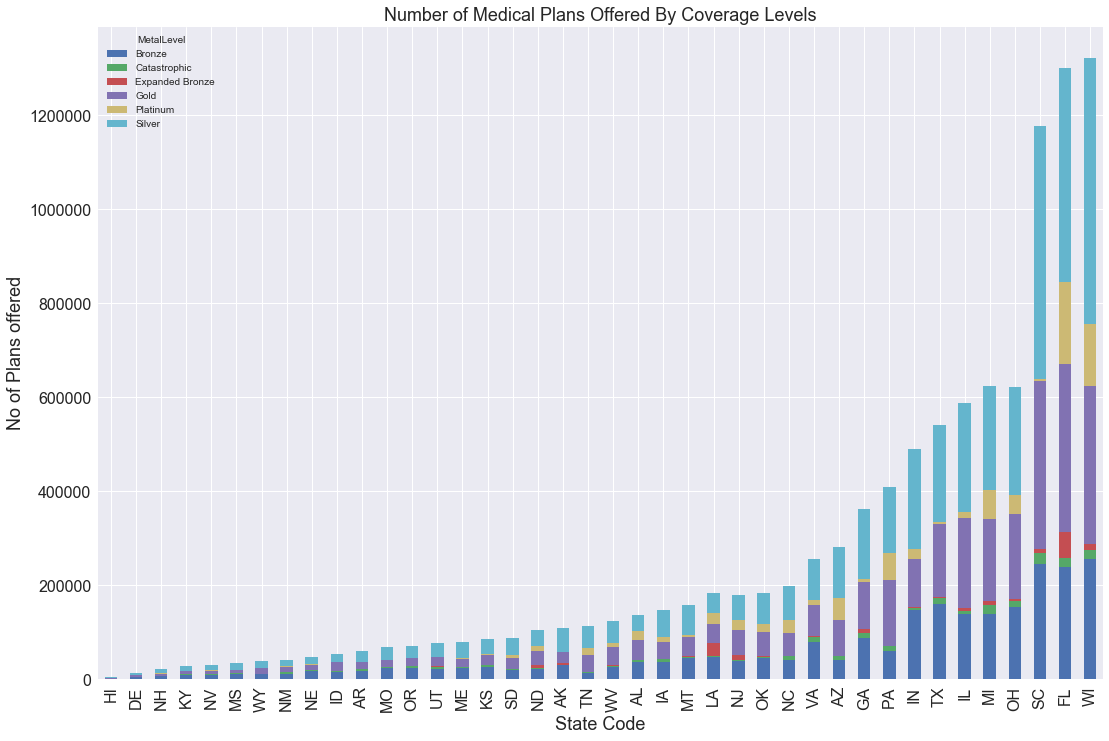

In [125]:
statewise_plan.plot(kind='bar', figsize=(18,12), stacked=True, fontsize=16)                  
plt.title("Number of Medical Plans Offered By Coverage Levels", fontsize=18 )
plt.ylabel("No of Plans offered", fontsize=18)
plt.xlabel("State Code", fontsize=18)
plt.show()

We can see **silver** plan is the most offered plan compared to other metal plan. Wisconsin(WI) is the state which offers more number of plans than any other participating state. Florida(FL) is very close to WI. Three states(South Carolina, Florida, and Wisconsin) offered more than 1 milliom plans to its population since the inception of ACA or Obamamcare. 

#### Individual rate distribution of coverage ####
Let's look into the individual rate of all this metal level plan. For this analysis we would need only metal level and Individual rate. We will use ggplot boxplot. Boxplot will give better idea of the number of measurements and of their distribution within each metal.

In [126]:
# Plan rate dataset has the required column for this plot.
plan_rates.head(2)

,Age,BusinessYear,FederalTIN,ImportDate,IndividualRate,IndividualTobaccoRate,IssuerId,PlanId,RateEffectiveDate,RateExpirationDate,RatingAreaId,SourceName,StateCode,Tobacco,MetalLevel,TEHBInnTier1IndividualMOOP,TEHBInnTier2IndividualMOOP,TEHBOutOfNetIndividualMOOP
0,0-20,2014,93-0438772,2014-03-19 07:06:49,29.0,NaN,21989,21989AK0010001,2014-01-01,2014-12-31,Rating Area 1,HIOS,AK,No Preference,Low,0,0,0
3,21,2014,93-0438772,2014-03-19 07:06:49,32.0,NaN,21989,21989AK0010001,2014-01-01,2014-12-31,Rating Area 1,HIOS,AK,No Preference,Low,0,0,0


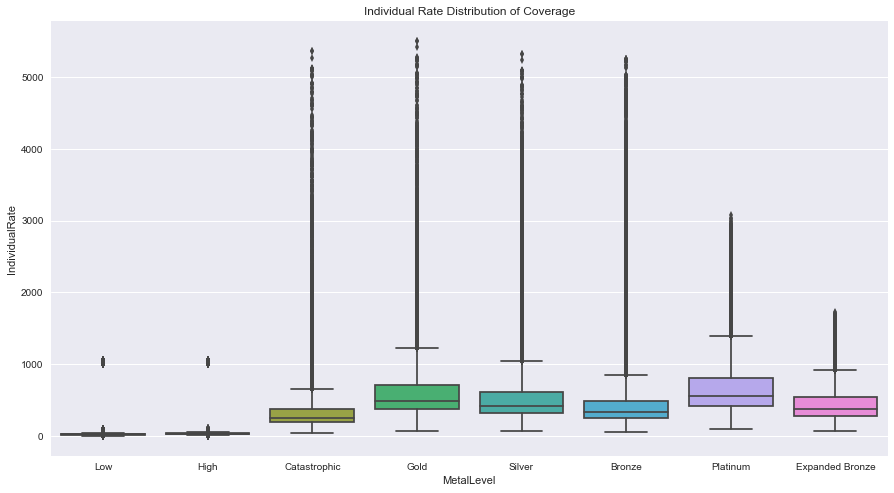

In [202]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="MetalLevel", y="IndividualRate", data=plan_rates)
plt.title('Individual Rate Distribution of Coverage')
plt.xlabel("Metal Level")
plt.ylabel("Individual Rate")
plt.show()

### Let's see how plan rates vary by age ###
we will be using Age column of the paln_rates dataframe

In [144]:
# the age column has two different kind of grouping. we will consider only the ages with standard.
plan_rates.Age.unique()

array(['0-20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65 and over', '0-14', '15', '16', '17', '18', '19', '20',
       '64 and over'], dtype=object)

In [145]:
# we will delete the last 8 kind of groups.
# store the age group in a list which are needed: age_grp
age_grp = ['0-20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65 and over'] 

# dtaframe to store only the required column: age_coverage
age_coverage = plan_rates[['Age','MetalLevel','IndividualRate']]

In [146]:
# remove rows which are not in age_grp
age_coverage = age_coverage[age_coverage.Age.isin(age_grp)]

# print the unique values of age column:
print(age_coverage.Age.unique())

['0-20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33'
 '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' '47' '48'
 '49' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '60' '61' '62' '63'
 '64' '65 and over']


In [147]:
# Age based plan rates
age_coverage = age_coverage.groupby(['Age','MetalLevel'])

In [148]:
# Calculate the average of individual rate in each metal of each age group.
age_indi_mean = age_coverage.mean().unstack()

In [149]:
# print some records to check the dataframe.
age_indi_mean.head()

IndividualRate                                                      \
MetalLevel         Bronze Catastrophic Expanded Bronze        Gold       High   
Age                                                                             
0-20           149.288243   116.007036      155.944416  216.183814  31.186172   
21             240.614526   188.305941      273.620679  348.046767  48.886315   
22             240.688985   188.444208      273.731711  348.125454  48.922582   
23             240.782882   188.618763      273.871721  348.224678  48.959078   
24             240.899141   188.834807      274.045132  348.347524  48.998107   

                                               
MetalLevel        Low    Platinum      Silver  
Age                                            
0-20        23.992399  245.230857  183.261723  
21          80.249034  396.102011  298.174770  
22          80.314323  396.104725  298.249905  
23          80.380923  396.108151  298.344639  
24          80.447992  396.112390  298.461935

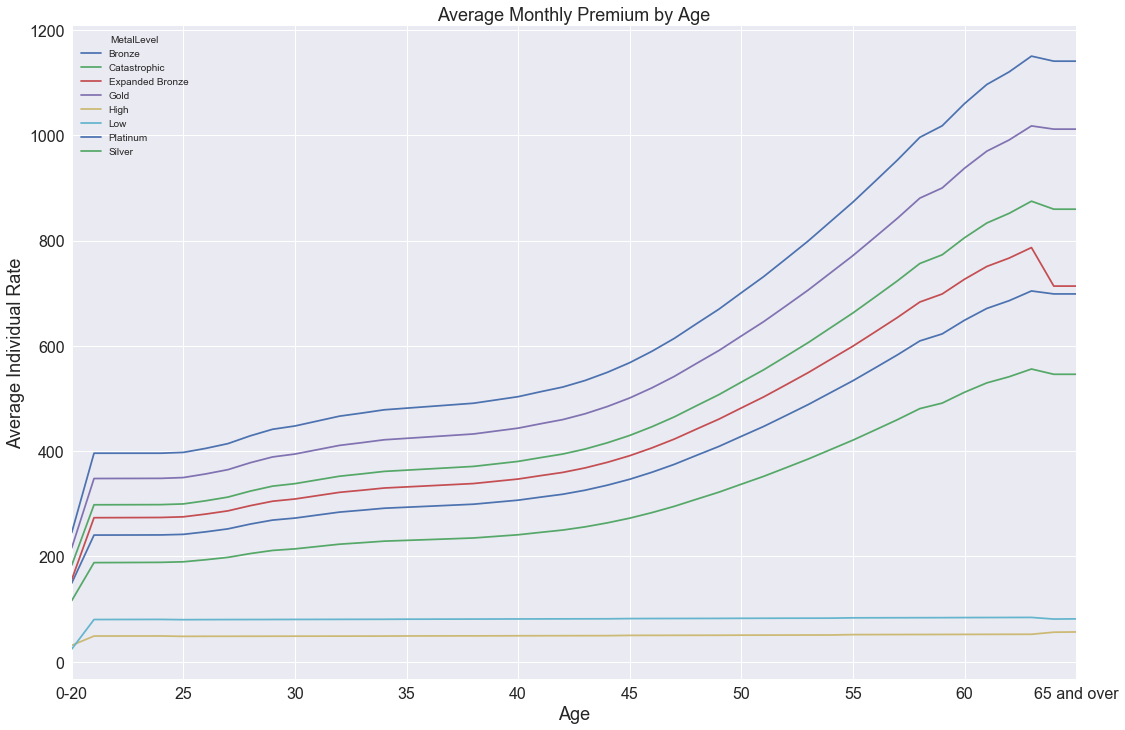

In [150]:
# ploting the age and average monthly individual rate relationship
age_indi_mean.plot(y='IndividualRate', figsize=(18,12), fontsize=16)
plt.title("Average Monthly Premium by Age", fontsize=18)
plt.ylabel("Average Individual Rate", fontsize=18)
plt.xlabel('Age',fontsize=18)
plt.show()

As the age increases the average individual rate premium also increases. After age of 62/63 the premium amount almost remains the same. 

#### checking the case of low and high

In [151]:
age_indi_mean.head()

IndividualRate                                                      \
MetalLevel         Bronze Catastrophic Expanded Bronze        Gold       High   
Age                                                                             
0-20           149.288243   116.007036      155.944416  216.183814  31.186172   
21             240.614526   188.305941      273.620679  348.046767  48.886315   
22             240.688985   188.444208      273.731711  348.125454  48.922582   
23             240.782882   188.618763      273.871721  348.224678  48.959078   
24             240.899141   188.834807      274.045132  348.347524  48.998107   

                                               
MetalLevel        Low    Platinum      Silver  
Age                                            
0-20        23.992399  245.230857  183.261723  
21          80.249034  396.102011  298.174770  
22          80.314323  396.104725  298.249905  
23          80.380923  396.108151  298.344639  
24          80.447992  396.112390  298.461935

There are 2 categories of Marketplace dental plans: **High and Low.**

The high coverage level has higher premiums but lower copayments and deductibles. So you'll pay more every month, but less when you use dental services.<br>
The low coverage level has lower premiums but higher copayments and deductibles. So you’ll pay less every month, but more when you use dental services.<br>
When you compare dental plans in the Marketplace, you’ll find details about each plan’s costs, copayments, deductibles, and services covered.

**Adult & child dental insurance in the Marketplace**

Under the health care law, dental insurance is treated differently for adults and children 18 and under.

Dental coverage is an essential health benefit for children. This means if you’re getting health coverage for someone 18 or younger, dental coverage must be available for your child either as part of a health plan or as a stand-alone plan. Note: While dental coverage for children must be available to you, you don’t have to buy it.<br>
Dental coverage isn't an essential health benefit for adults. Insurers don’t have to offer adult dental coverage.

### Carrier and plan rates ###
Carrir referes to the company which provides insurance. In this analysis we will use IssuerId column of plan_rates dataframe.

In [158]:
carrier_coverage = plan_rates[['StateCode','IssuerId','PlanId','IndividualRate']].groupby(
    ['StateCode'])

In [182]:
total_carr_in_state = carrier_coverage.IssuerId.nunique()

In [183]:
total_carr_in_state

StateCode
AK    11
AL    18
AR    15
AZ    33
DE    14
FL    38
GA    31
HI     5
IA    23
ID     8
IL    31
IN    28
KS    19
KY     8
LA    19
ME    13
MI    38
MO    26
MS    10
MT    12
NC    19
ND    15
NE    20
NH    16
NJ    20
NM     8
NV    17
OH    40
OK    22
OR    19
PA    43
SC    20
SD    13
TN    21
TX    44
UT    16
VA    31
WI    38
WV    14
WY    14
Name: IssuerId, dtype: int64

In [184]:
total_carr_in_state.sort_values(inplace=True)

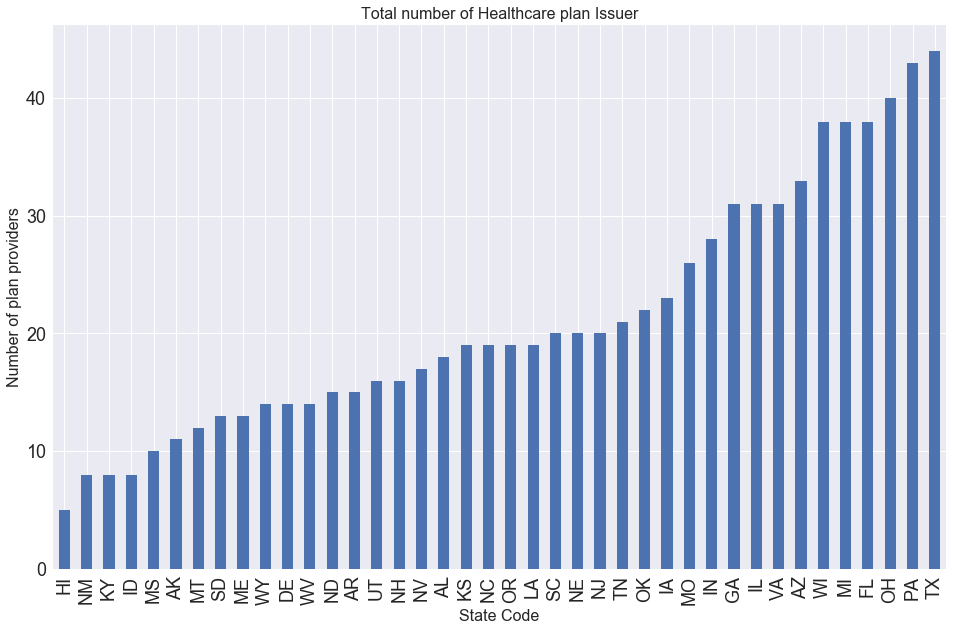

In [185]:
total_carr_in_state.plot(kind='bar', figsize=(16, 10), fontsize=18)
plt.title("Total number of Healthcare plan Issuer", fontsize=16)
plt.xlabel('State Code', fontsize=16)
plt.ylabel('Number of plan providers',fontsize=16)
plt.show()

In [186]:
# Average individual rate carrierwise: indi_mean_carrier
indi_mean_carrier = carrier_coverage.IndividualRate.mean()

In [187]:
# Total plan offered by each carrier: total_plan_offered
total_plan_offered = carrier_coverage.PlanId.count()

In [188]:
# convert pandas series to dataframe
total_carr_in_state.to_frame()

,IssuerId
StateCode,
HI,5
NM,8
KY,8
ID,8
MS,10
AK,11
MT,12
SD,13
ME,13


In [189]:
indi_mean_carrier.to_frame()

,IndividualRate
StateCode,
AK,684.405947
AL,261.070948
AR,232.584663
AZ,337.027907
DE,370.211275
FL,274.018980
GA,293.314577
HI,312.761676
IA,310.901235


In [190]:
# convert pandas series to dataframe and reset index
total_carr_in_state = total_carr_in_state.to_frame().reset_index()

In [192]:
# # convert pandas series to dataframe and reset index
total_plan_offered = total_plan_offered.to_frame().reset_index()

In [195]:
indi_mean_carrier = indi_mean_carrier.to_frame().reset_index()

In [196]:
# join three dataframes indi_mean_carrier,carrier_in_state, and total_plan_offered:
#carrier_plan_rate
carrier_plan_rate = total_carr_in_state.merge(total_plan_offered, 
                                        on='StateCode').merge(indi_mean_carrier, on='StateCode')

In [197]:
# set state code as index
carrier_plan_rate = carrier_plan_rate.set_index('StateCode')

In [198]:
# divide plan id with 1000 so that the bar graph is more readable and number of plans offered 
# will be read as hundred of thousands, for example 200K number of plans
carrier_plan_rate['PlanId'] = carrier_plan_rate['PlanId'].apply(lambda x: x/1000)

In [199]:
carrier_plan_rate

,IssuerId,PlanId,IndividualRate
StateCode,,,
HI,5,5.327,312.761676
NM,8,54.620,265.096672
KY,8,50.488,281.572626
ID,8,68.154,318.656129
MS,10,62.276,247.188384
AK,11,128.321,684.405947
MT,12,236.074,316.857380
SD,13,111.208,389.583685
ME,13,110.248,379.420510


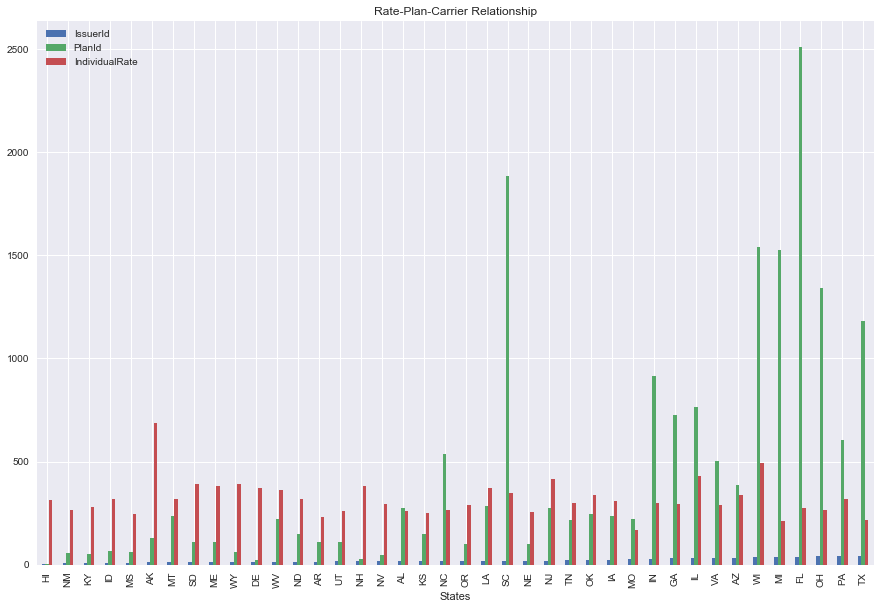

In [203]:
carrier_plan_rate.plot.bar(figsize=(15,10))
plt.xlabel("States")
plt.title("Rate-Plan-Carrier Relationship")
plt.show()

It is pretty much clear that when the number of issuer is less the premium is high and where the number of issuer is high the premium is low.